# BUA 451 Final Project


Alexa Anastasi  
BUA 451
Dataset Used:`bigquery-public-data.thelook_ecommerce.orders`

---

This project explores an e-commerce dataset to extract business-relevant insights through SQL-based exploratory data analysis (EDA), and develops a supervised learning model to predict order returns. The findings are visualized using Python libraries such as Seaborn and Plotly, and the model's performance is evaluated using precision, recall, and F1-score metrics.


### Executive Summary

This project analyzes an e-commerce dataset to uncover business-relevant insights and develop a machine learning model to predict returned orders.

Using SQL in BigQuery, two key insights were extracted:
1. A large portion of orders were returned or cancelled, indicating potential issues with fulfillment or product fit.
2. Monthly order volume revealed seasonal trends, with order spikes in January and April, and slower sales in May through August.

A predictive model was then built to classify whether an order would be returned. After testing multiple models, a decision tree classifier was selected due to its improved ability to identify returned orders, even at the cost of lower overall accuracy. The project concludes with recommendations based on both analytical insights and model results.

### Dataset Description

The dataset used for this project is `bigquery-public-data.thelook_ecommerce.orders`, a public e-commerce dataset available in Google BigQuery. It includes detailed order-level data such as:

- `status` of each order (e.g., Shipped, Returned, Cancelled)
- `num_of_item` — number of items per order
- `gender` — of the customer
- `created_at`, `delivered_at`, and `returned_at` timestamps

The dataset spans multiple years and contains hundreds of thousands of orders, making it well-suited for exploratory analysis and machine learning.


In [1]:
#Importing Packages & Loading Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


status_df = pd.read_csv('orders_by_status.csv')
monthly_df = pd.read_csv('orders_by_month.csv')

# Insight 1: Order Status Breakdown

<ipython-input-2-30334b9dcfc7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=status_df, x='status', y='total_orders', palette='pastel')


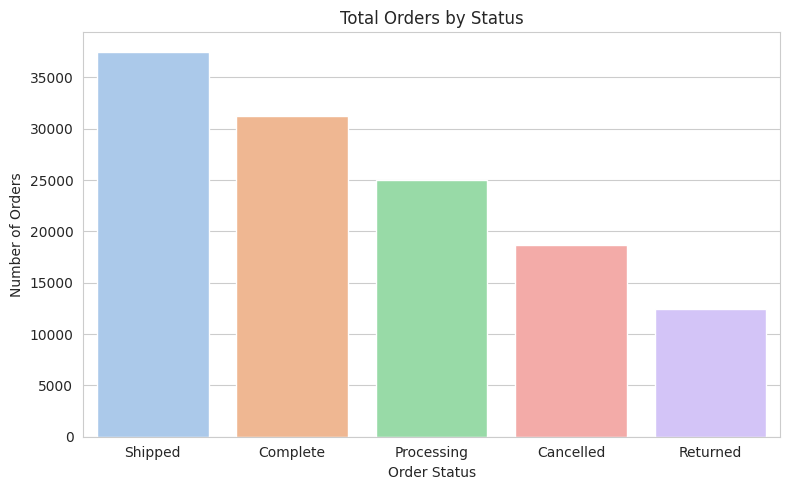

In [2]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=status_df, x='status', y='total_orders', palette='pastel')

plt.title('Total Orders by Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

### Summary of Insight 1

This bar chart displays the total number of orders for each order status. The most common statuses are **Shipped** and **Complete**, indicating strong fulfillment volume. However, a significant number of orders are **Cancelled** and **Returned**, which could be negatively impacting customer satisfaction and profitability.

From a business perspective, the company should investigate:
- Why returns are occurring
- Whether certain products or customer segments are driving higher return rates
- How order cancellations could be reduced
Addressing these issues could lead to improvements in operational efficiency and customer retention.

# Insight 2: Monthly Order Volume

In [3]:
# Creating readable month names from numeric month values
month_labels = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_df['month_name'] = monthly_df['order_month'].map(month_labels)

In [4]:
# Creating interactive bar chart using plotly to show monthly total orders
fig = px.bar(
    monthly_df,
    x='month_name',
    y='total_orders',
    title='Monthly Order Volume',
    labels={'month_name': 'Month', 'total_orders': 'Total Orders'},
    color='total_orders',
    text='total_orders'
)

fig.update_layout(xaxis_title='Month', yaxis_title='Total Orders')
fig.show()

### Summary of Insight 2

This interactive bar chart visualizes the total number of orders placed each month. The data reveals a significant spike in order volume in **April (16,938 orders)** and higher activity in **March and January**. In contrast, the summer months of **May through August** experience a noticeable dip, with May showing the lowest order count at just **7,599 orders**.

**Business Relevance:**  
These trends display strong **seasonality** in customer purchasing behavior. The business can use this insight to:
- Plan inventory levels more effectively to meet demand spikes
- Launch targeted **marketing campaigns** in slower months
- Adjust staffing in fulfillment and customer support to align with order volume

Understanding when customers are most and least active helps optimize operational efficiency and revenue growth throughout the year.

### Model 1: Logistic Regression

In [5]:
import pandas as pd

df = pd.read_csv('orders_for_modeling.csv')
df.head()

,status,gender,num_of_item,order_month
0,Cancelled,F,1,1
1,Cancelled,F,1,1
2,Cancelled,F,1,1
3,Cancelled,F,4,1
4,Cancelled,F,1,1


In [6]:
#Create Target Variable: Returned
df['returned'] = df['status'].apply(lambda x: 1 if x == 'Returned' else 0)
df = df.drop(columns=['status'])  # Drop original 'status'
df.head()

,gender,num_of_item,order_month,returned
0,F,1,1,0
1,F,1,1,0
2,F,1,1,0
3,F,4,1,0
4,F,1,1,0


In [7]:
#Encode Categorical Variables
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
df.head()

,num_of_item,order_month,returned,gender_M
0,1,1,0,False
1,1,1,0,False
2,1,1,0,False
3,4,1,0,False
4,1,1,0,False


In [8]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['returned'])  # Features
y = df['returned']                 # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
#Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
#Evaluating models predictions
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22524     0]
 [ 2451     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     22524
           1       0.00      0.00      0.00      2451

    accuracy                           0.90     24975
   macro avg       0.45      0.50      0.47     24975
weighted avg       0.81      0.90      0.86     24975



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Summary Model 1: Logistic Regression

To begin the classification task of predicting whether an order would be returned, a logistic regression model was trained using default parameters.

**Results:**
- **Accuracy:** 90%
- **Precision / Recall (Returned orders):** 0.00 / 0.00
- The model **predicted only the majority class** (non-returned orders), and completely failed to identify any returned orders (class 1).
- This occurred due to **severe class imbalance** in the dataset: returned orders made up only about 10% of the total.

**Conclusion:**
Although the model showed high overall accuracy, its inability to detect any of the minority class made it ineffective for our business goal of identifying returned orders.

**Next:**
To better handle the class imbalance and improve recall for returned orders, I decided to try a different model — a **Decision Tree Classifier** with class weighting enabled.

### Model 2: Decision Tree Classifier (with Class Weighting)

In [11]:
#Training Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[12880  9644]
 [ 1395  1056]]
              precision    recall  f1-score   support

           0       0.90      0.57      0.70     22524
           1       0.10      0.43      0.16      2451

    accuracy                           0.56     24975
   macro avg       0.50      0.50      0.43     24975
weighted avg       0.82      0.56      0.65     24975



### Summary Model 2: Decision Tree Classifier

To improve the model's ability to identify returned orders, a Decision Tree Classifier was trained with `class_weight='balanced'` to account for class imbalance.

**Results:**
- **Accuracy:** 56%
- **Precision (Returned orders):** 0.10
- **Recall (Returned orders):** 0.43
- **F1-score (Returned orders):** 0.16

The model was able to correctly predict a meaningful portion of returned orders (1,056 out of 2,451), improving upon the logistic regression model which predicted none. Although the overall accuracy decreased compared to Model 1, the model achieved a **better balance between identifying both returned and non-returned orders**.

**Conclusion:**
The Decision Tree model was better aligned with the business objective — flagging potential returns to minimize cost and improve fulfillment strategies. Therefore, it was selected as the more effective model.

### Modeling Process & Final Evaluation

This project applied supervised learning to predict whether an e-commerce order would be returned. The target variable was created by converting the `status` field into a binary classification problem: `Returned` (1) vs. `Not Returned` (0). Feature variables included `num_of_item`, `gender`, and `order_month`.

Two models were tested:

1. **Logistic Regression**  
   - High accuracy (90%)  
   - Failed to detect returned orders (recall = 0) due to class imbalance  
   - Rejected due to poor business applicability

2. **Decision Tree Classifier (with class weighting)**  
   - Lower accuracy (56%), but significantly improved recall for returns (43%)  
   - Successfully identified returned orders, providing more actionable insights

**Final Evaluation:**
While the Decision Tree model was less accurate overall, it was more effective at detecting returned orders - my primary goal. In real-world business settings, especially with imbalanced data, recall for the minority class (returns) often carries more value than overall accuracy. This makes the Decision Tree a better strategic choice in this case.

### Managerial Insights and Takeaways

1. **Returned Orders are Significant**  
   A large number of orders in the dataset are either returned or cancelled. This suggests the company should investigate potential product quality or customer satisfaction issues that are driving returns. Enhancing product descriptions, improving sizing accuracy, or revisiting return policies could help reduce this loss.

2. **Order Volume is Seasonal**  
   Monthly trends show that order volume spikes in January and April, with noticeable drops in mid-year months. This insight supports targeted planning for inventory, staffing, and marketing campaigns during high- and low-demand periods.

3. **Predictive Modeling Can Help Flag High-Risk Orders**  
   The final decision tree model achieved 43% recall on returned orders. While not perfect, it could be used as a decision support tool to flag potentially risky orders for review or follow-up, helping reduce return-related costs.

**Recommendation:**  
The company should combine insights from data analysis and predictive modeling to optimize inventory management, reduce return rates, and enhance the customer experience.